<a href="https://colab.research.google.com/github/kimkukhwa/FBProphet_Test/blob/main/FBProphet_football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly


## Importing Data from Github

In [ ]:

url='https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'
df = pd.read_csv(url)
df.tail(10)


,ds,y
2895,2016-01-11,8.470730
2896,2016-01-12,8.135054
2897,2016-01-13,8.067149
2898,2016-01-14,8.023552
2899,2016-01-15,8.021913
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871
2904,2016-01-20,8.891374


## Instantiating a Fbprophet model & Fitting the historical data

In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Setting prediction days

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


## Predicted value & confidence intervals 

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213670,7.482585,8.972695
3266,2017-01-16,8.538673,7.834583,9.261614
3267,2017-01-17,8.326104,7.616610,9.096335
3268,2017-01-18,8.158756,7.397207,8.903850
3269,2017-01-19,8.170689,7.432652,8.882746


## Prophet.plot method to plot the forecast

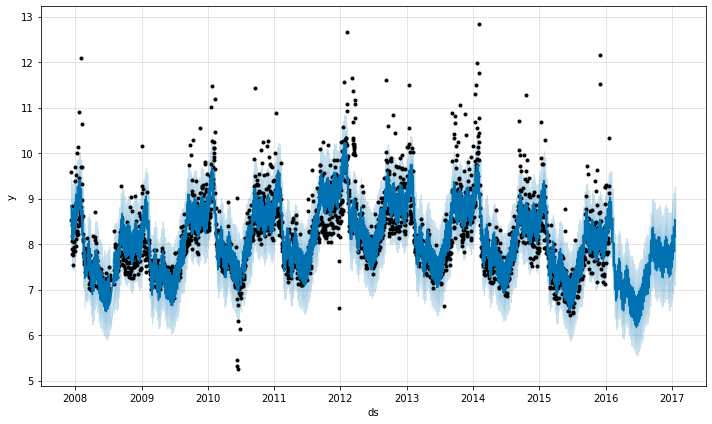

In [ ]:
fig1 = m.plot(forecast)


## Trend, yearly seasonality, and weekly seasonality of the time series

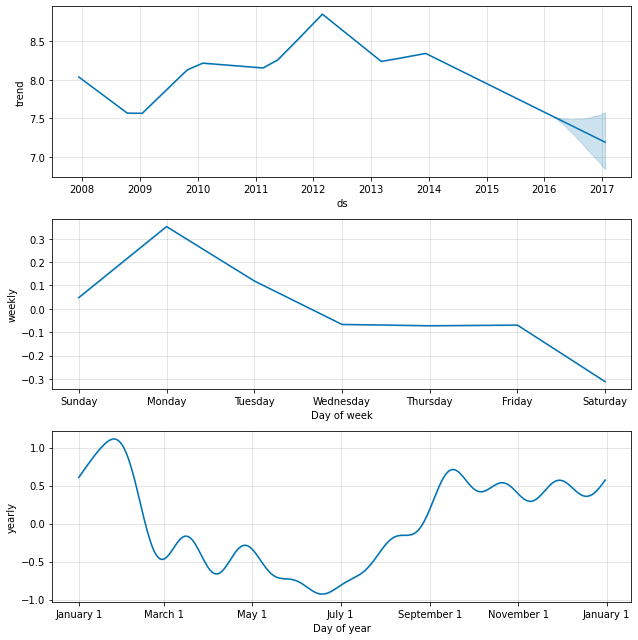

In [ ]:
fig2 = m.plot_components(forecast)


## Interactive figures with plotly

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)
